In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [241]:
df=sns.load_dataset("titanic")

In [242]:
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [243]:
print(df.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [244]:
print(df.describe(include='all'))

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

In [245]:
total_rows = df.shape[0]
unique_rows= len(df.drop_duplicates())
duplicates_count = total_rows - unique_rows

df=df.drop_duplicates()

print(f'Total number of rows: {total_rows}')
print(f'Number of rows without duplicates: {unique_rows}')
print(f"Number of duplicates: {duplicates_count}")

Total number of rows: 891
Number of rows without duplicates: 784
Number of duplicates: 107


In [246]:
df['relatives'] = df['sibsp']+df['parch']
df.drop(['sibsp','parch'], axis=1, inplace=True)

In [247]:
df

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,relatives
0,0,3,male,22.0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,5
887,1,1,female,19.0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


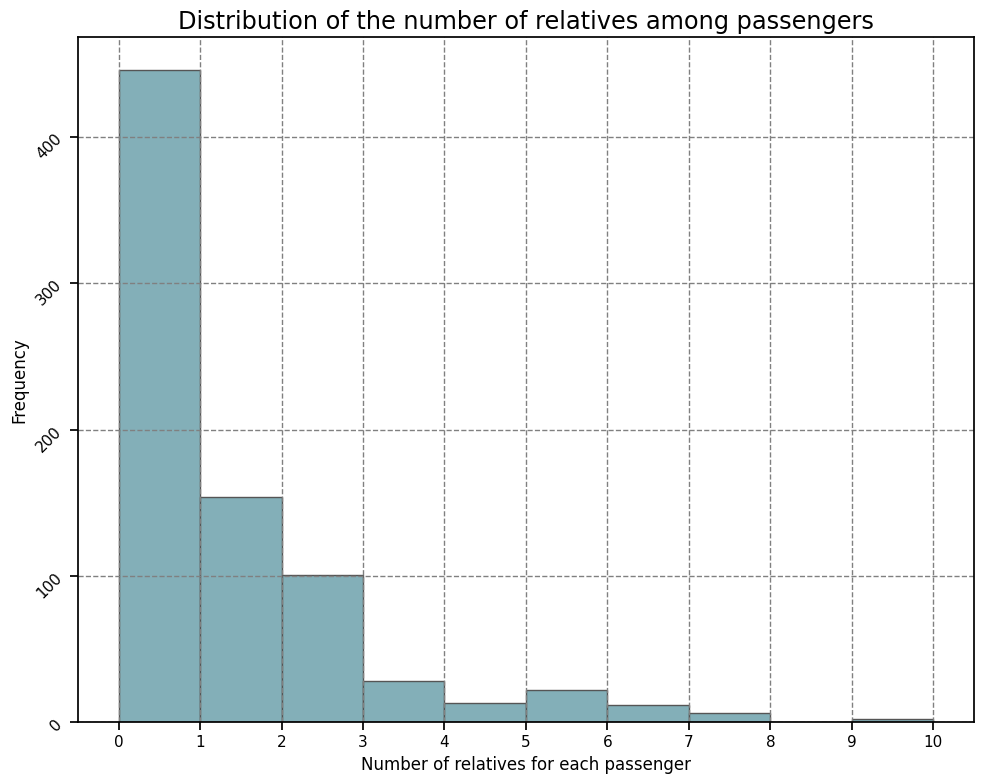

In [248]:
sns.set_context("notebook")
ax, fig = plt.subplots(figsize=(10,8))
plt.hist(df['relatives'].dropna(), color="#83afb8",edgecolor='#555555')
plt.xticks(ticks=range(0, df['relatives'].max() + 1, 1))
plt.title("Distribution of the number of relatives among passengers",size='x-large')
plt.xlabel("Number of relatives for each passenger")
plt.ylabel("Frequency")
plt.yticks(rotation=45)
plt.tight_layout()
plt.grid(True,linestyle='--',color='gray')
plt.savefig('hist_relatives.png',  dpi=500)

plt.show()

In [249]:
df['relatives'] = df['relatives'].apply(lambda x: "above 5" if x >5 else x)

In [250]:
df.head(15)

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,relatives
0,0,3,male,22.0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
5,0,3,male,NaN,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,0
6,0,1,male,54.0,51.8625,S,First,man,True,E,Southampton,no,True,0
7,0,3,male,2.0,21.0750,S,Third,child,False,NaN,Southampton,no,False,4
8,1,3,female,27.0,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,2
9,1,2,female,14.0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,1


Key statistics:
count     784
unique      7
top         0
freq      446
Name: relatives, dtype: int64
----------------------------------------------------------------------------------------------------
Frequency of each category:
relatives
0          446
1          154
2          101
3           28
4           13
5           22
above 5     20
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Frequency of each category in %:
relatives
0          56.9
1          19.6
2          12.9
3           3.6
4           1.7
5           2.8
above 5     2.6
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
Moda:0


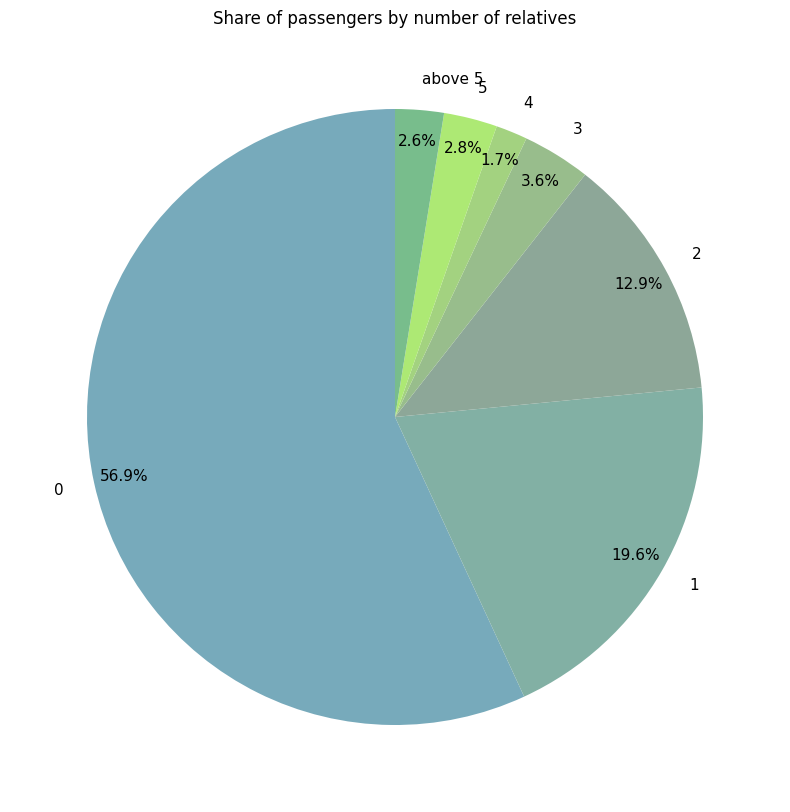

In [251]:
df['relatives'] = df['relatives'].astype('category')
df['relatives']=df['relatives'].cat.reorder_categories([0,1,2,3,4,5,'above 5'],ordered=True)

print(f'Key statistics:\n{df['relatives'].describe()}')

print("--"*50)

print(f'Frequency of each category:\n{df['relatives'].value_counts().sort_index()}')

print("--"*50)

print(f'Frequency of each category in %:\n{(df["relatives"].value_counts(normalize=True)*100).round(1).sort_index()}')

print("--"*50)

print(f'Moda:{df['relatives'].mode()[0]}')

counts = df['relatives'].value_counts().reindex([0,1,2,3,4,5,'above 5'])

ax, fig = plt.subplots(figsize=(12,10))
plt.pie(counts,
        labels=counts.index,
        autopct='%.1f%%',
        startangle=90,
        colors=("#77AABB", "#82B0A4", "#8DA798", "#98BD8C", "#A3D280", "#ADE974", "#78BD8C"),
        pctdistance=0.9,
        labeldistance=1.1,
        textprops={'fontsize':11})


plt.title("Share of passengers by number of relatives")
plt.savefig('pie_age_category.png',  dpi=300)

plt.show()

In [252]:
df['age'].fillna(df['age'].median(),inplace=True)

In [253]:
def categories(row):
    if row['age'] < 14:
        return 'under 14 years old'
    elif row['age'] < 35:
        return '14-34 years old'
    elif row['age'] < 60:
        return '35-59 years old'
    elif row['age'] >= 60:
        return '60 years old and older'
    else:
        return 'Unknown'

df['age_categories']=df.apply(categories,axis=1)

In [254]:
df['alive']=df['alive'].replace({'yes':True,'no':False})
df['alive']=df['alive'].astype('bool')

death_by_categories = (df.groupby('age_categories',as_index=False)['alive']
                       .apply(lambda x: (x==False)
                       .sum())
                       .sort_values(by='alive',ascending=False)
                       .rename(columns={"alive":"death rate"}))
print(f'Mortality by age group:\n {death_by_categories}')

print(f'\n' + '--'*50 + '\n')

count_passengers=df['alive'].count()
print(f'Total number of passengers: {count_passengers}')

print(f'\n' + '--'*50 + '\n')

count_no = (df['alive'] == False).sum()
print(f"Number of those who did not survive: {count_no}")

print(f'\n' + '--'*50 + '\n')

by_categories = (df.groupby('age_categories',as_index=False)['alive']
                 .apply(lambda x: (x == False).sum() /x.count())
                 .rename(columns={'alive':"% of death"})
                 .sort_values('% of death',ascending = False))
by_categories['% of death'] = by_categories['% of death'].round(3)*100
print(f"Mortality rates by age group:\n {by_categories}")


Mortality by age group:
            age_categories  death rate
0         14-34 years old         294
1         35-59 years old         119
3      under 14 years old          29
2  60 years old and older          19

----------------------------------------------------------------------------------------------------

Total number of passengers: 784

----------------------------------------------------------------------------------------------------

Number of those who did not survive: 461

----------------------------------------------------------------------------------------------------

Mortality rates by age group:
            age_categories  % of death
2  60 years old and older        73.1
0         14-34 years old        60.9
1         35-59 years old        58.0
3      under 14 years old        41.4


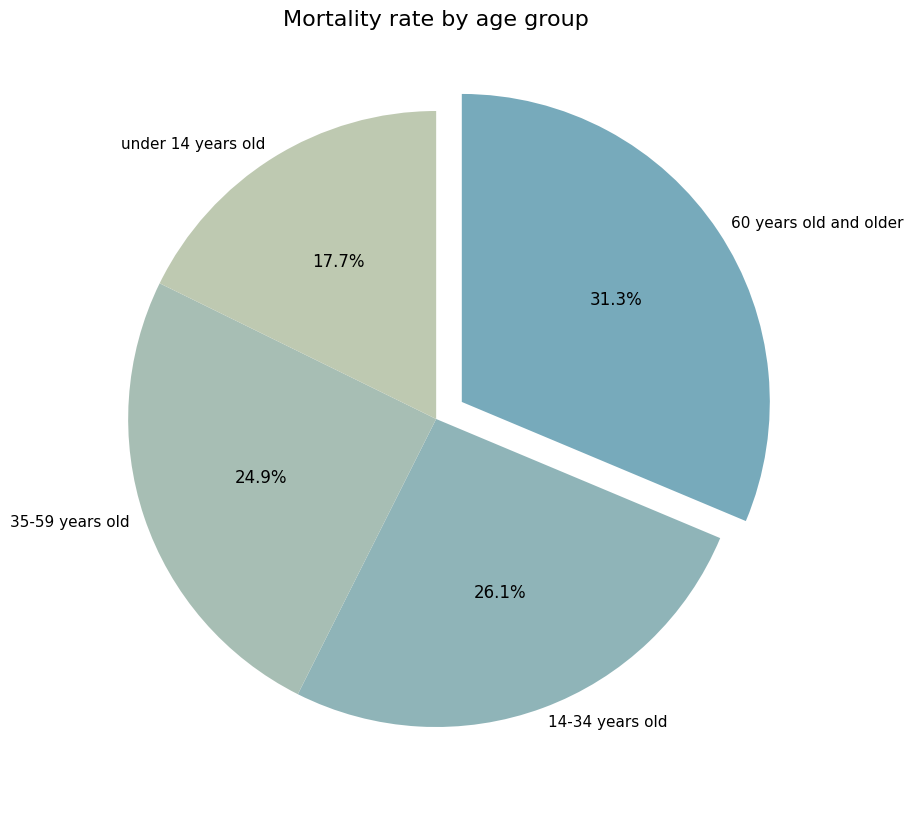

In [255]:
ax, fig = plt.subplots(figsize=(12,10))
plt.pie(x=by_categories['% of death'],
        labels=by_categories['age_categories'],
        startangle=90,
        explode=[0.1,0,0,0],
        autopct='%.1f%%',
        colors=sns.color_palette("blend:#7AB,#EDA"),
        counterclock=False,
        labeldistance=1.05)

plt.title("Mortality rate by age group",size=16)

plt.savefig('barpie_age_category.png', dpi=500)
plt.show()


Mortality rate by ticket class:
    pclass  % of death
2       3        74.3
1       2        49.1
0       1        36.9
Conclusion: The highest mortality rate was recorded among third-class passengers, followed by second-class passengers, while the highest survival rate was among first-class passengers.
This is consistent with the assumption that passengers in higher classes had priority during evacuation and better access to rescue equipment.

----------------------------------------------------------------------------------------------------

Mortality rate by cabin deck:
   deck  % of death
0    A        53.3
6    G        50.0
2    C        40.7
5    F        38.5
1    B        26.1
4    E        25.0
3    D        24.2
Conclusion: The highest mortality rate was observed among passengers on decks A and G.
Deck G was the lowest and was mainly occupied by third-class passengers, which partly explains the high mortality rate.
Data for deck A should be interpreted with caution due to 

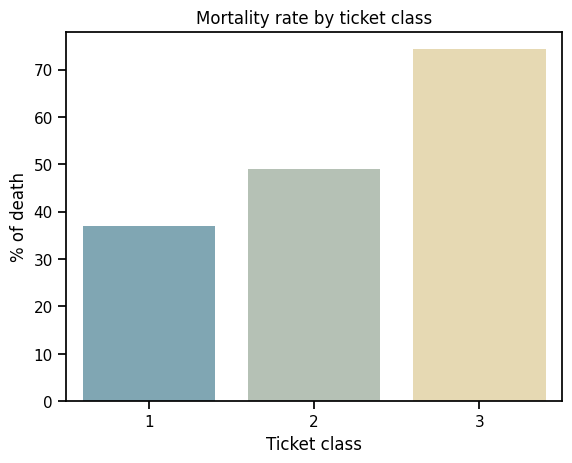

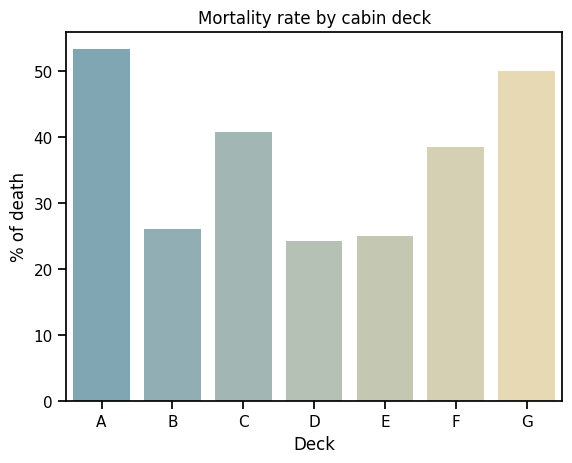

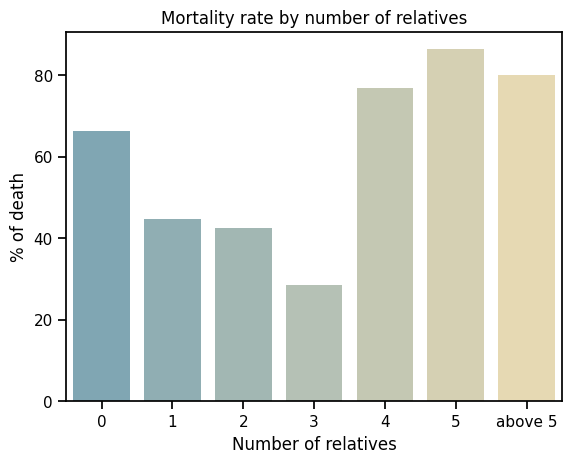

In [256]:
death_by_ticket = (df.groupby('pclass',as_index=False)['alive']
                   .apply(lambda x: (x == False).sum()/x.count()*100)
                   .rename(columns=({'alive':'% of death'}))
                   .sort_values('% of death',ascending = False)
                   .round(1))
print(f'Mortality rate by ticket class:\n {death_by_ticket}')
print("Conclusion: The highest mortality rate was recorded among third-class passengers, followed by second-class passengers, while the highest survival rate was among first-class passengers.\nThis is consistent with the assumption that passengers in higher classes had priority during evacuation and better access to rescue equipment.")
print(f'\n' + '--'*50 + '\n')

death_by_deck = (df.groupby('deck',as_index=False)['alive']
                   .apply(lambda x: (x == False).sum()/x.count()*100)
                   .rename(columns=({'alive':'% of death'}))
                   .sort_values('% of death',ascending = False)
                   .round(1))
print(f'Mortality rate by cabin deck:\n {death_by_deck}')
print("Conclusion: The highest mortality rate was observed among passengers on decks A and G.\nDeck G was the lowest and was mainly occupied by third-class passengers, which partly explains the high mortality rate.\nData for deck A should be interpreted with caution due to the small number of passengers.")

print(f'\n' + '--'*50 + '\n')

death_by_relatives = (df.groupby('relatives',as_index=False)['alive']
                   .apply(lambda x: (x == False).sum()/x.count()*100)
                   .rename(columns=({'alive':'% of death'}))
                   .sort_values('% of death',ascending = False)
                   .round(1))
print(f'Mortality rate by number of relatives:\n {death_by_relatives}')
print("Conclusion: Passengers traveling with five or more relatives show the highest mortality rate.\nThis is likely due to the fact that they attempted to evacuate together with their family members, which reduced their chances of being rescued quickly.")

print(f'\n' + '--'*50 + '\n')

print("Overall conclusion: Passengers' chances of survival depended most on their age, ticket class, and deck.\nThe highest mortality rate was observed among people over 60, third-class passengers, and those on the lower decks, especially G.\nSocial conditions and cabin location had a decisive influence on the possibility of evacuation.")
print(f'\n' + '--'*50 + '\n')

sns.barplot(x='pclass', y='% of death', data=death_by_ticket, palette="blend:#7AB,#EDA")
plt.title("Mortality rate by ticket class")
plt.ylabel("% of death")
plt.xlabel("Ticket class")
plt.savefig('barplot_ticket_class.png',  dpi=300)
plt.show()

sns.barplot(x='deck', y='% of death', data=death_by_deck, palette="blend:#7AB,#EDA")
plt.title("Mortality rate by cabin deck")
plt.ylabel("% of death")
plt.xlabel("Deck")
plt.savefig('barplot_cabin_desk.png', dpi=300)
plt.show()

sns.barplot(x='relatives', y='% of death', data=death_by_relatives, palette="blend:#7AB,#EDA")
plt.title("Mortality rate by number of relatives")
plt.ylabel("% of death")
plt.xlabel("Number of relatives")
plt.savefig('barplot_relatives.png', dpi=300)
plt.show()
